In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install -U scikit-learn

     |████████████████████████████████| 6.8MB 2.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.chdir("/content/drive/My Drive/Analytic-Steps-blogs")

In [5]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy


import warnings
warnings.filterwarnings("ignore")


In [6]:
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [7]:
ls

client_secret.json  english_comments.csv   ExtractedData.csv
Dataset.csv         extraced_comments.csv


In [9]:
data = pd.read_csv("Dataset.csv")

In [10]:
data.head()

,Video ID,Comment ID,comments
0,lkBJdYWh9LU,UgxD4O4SyXyAeypy7bl4AaABAg,Chai Question What degree do you wan...
1,lkBJdYWh9LU,Ugzwmy9YzWRCFGMEI0h4AaABAg,Masters in Biomedical Engineering
2,lkBJdYWh9LU,UgyEwpGS3mvj3SswC2J4AaABAg,Thank you so soooooooooo much I'll b...
3,lkBJdYWh9LU,UgyCJr4OjRPVQ63MRed4AaABAg,Masters in Data Science


In [11]:
data.shape

(4, 3)

In [12]:
data['polarity'] = data['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [13]:
data.head()

,Video ID,Comment ID,comments,polarity
0,lkBJdYWh9LU,UgxD4O4SyXyAeypy7bl4AaABAg,Chai Question What degree do you wan...,0.000000
1,lkBJdYWh9LU,Ugzwmy9YzWRCFGMEI0h4AaABAg,Masters in Biomedical Engineering,0.000000
2,lkBJdYWh9LU,UgyEwpGS3mvj3SswC2J4AaABAg,Thank you so soooooooooo much I'll b...,0.089167
3,lkBJdYWh9LU,UgyCJr4OjRPVQ63MRed4AaABAg,Masters in Data Science,0.000000


## Shuffle the dataset

In [14]:
data = data.sample(frac=1).reset_index(drop=True)

In [15]:
data['pol_cat']  = 0

Continuous to categorical

In [16]:
# data['pol_cat'][data.polarity == 0] = 0
data['pol_cat'][data.polarity > 0] = 1
data['pol_cat'][data.polarity <= 0] = -1


In [17]:
data.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,lkBJdYWh9LU,UgyCJr4OjRPVQ63MRed4AaABAg,Masters in Data Science,0.000000,-1
1,lkBJdYWh9LU,Ugzwmy9YzWRCFGMEI0h4AaABAg,Masters in Biomedical Engineering,0.000000,-1
2,lkBJdYWh9LU,UgxD4O4SyXyAeypy7bl4AaABAg,Chai Question What degree do you wan...,0.000000,-1
3,lkBJdYWh9LU,UgyEwpGS3mvj3SswC2J4AaABAg,Thank you so soooooooooo much I'll b...,0.089167,1


In [18]:
data['pol_cat'].value_counts()

-1    3
 1    1
Name: pol_cat, dtype: int64

Create separate dataframes for Negative,Positive & Neutral comments 

In [19]:
data_pos = data[data['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = data[data['pol_cat'] == -1]
data_neg = data_neg.reset_index(drop = True)

# data_neutral = data[data['pol_cat'] == 0]
# data_neutral = data_neutral.reset_index(drop = True)

In [20]:
data_pos.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,lkBJdYWh9LU,UgyEwpGS3mvj3SswC2J4AaABAg,Thank you so soooooooooo much I'll b...,0.089167,1


In [21]:
data_pos.shape

(1, 5)

In [24]:
data_neg.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,lkBJdYWh9LU,UgyCJr4OjRPVQ63MRed4AaABAg,Masters in Data Science,0.0,-1
1,lkBJdYWh9LU,Ugzwmy9YzWRCFGMEI0h4AaABAg,Masters in Biomedical Engineering,0.0,-1
2,lkBJdYWh9LU,UgxD4O4SyXyAeypy7bl4AaABAg,Chai Question What degree do you wan...,0.0,-1


In [23]:
data_neg['comments'][40]

KeyError: ignored

-1    3
 1    1
Name: pol_cat, dtype: int64

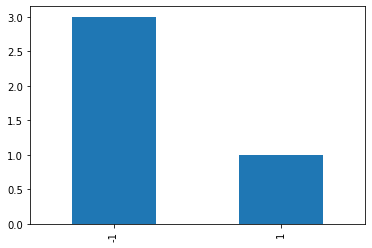

In [25]:
data.pol_cat.value_counts().plot.bar()
data.pol_cat.value_counts()

## Data Preprocessing

Lower the text in comments

In [26]:
data['comments'] = data['comments'].str.lower()

In [27]:
data['comments'].head()

0                           masters  in  data  science
1             masters  in  biomedical  engineering    
2      chai  question    what  degree  do  you  wan...
3    thank  you  so  soooooooooo  much      i'll  b...
Name: comments, dtype: object

In [28]:
data.describe()

,polarity,pol_cat
count,4.000000,4.0
mean,0.022292,-0.5
std,0.044583,1.0
min,0.000000,-1.0
25%,0.000000,-1.0
50%,0.000000,-1.0
75%,0.022292,-0.5
max,0.089167,1.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Video ID    4 non-null      object 
 1   Comment ID  4 non-null      object 
 2   comments    4 non-null      object 
 3   polarity    4 non-null      float64
 4   pol_cat     4 non-null      int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 288.0+ bytes


In [30]:
data['comments'][0]

'masters  in  data  science'

In [31]:
data['comments'][0].strip()

'masters  in  data  science'

In [32]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [35]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [36]:
stop_words = set(stopwords.words('english'))

In [37]:
data['comments'] = data['comments'].str.strip()

In [38]:
train = data.copy()

In [39]:
train['comments'] = train['comments'].str.strip()

In [40]:
train['comments'][0]

'masters  in  data  science'

In [41]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [42]:
data['stop_comments'] = data['comments'].apply(lambda x : remove_stopwords(x))

In [43]:
data.head()

,Video ID,Comment ID,comments,polarity,pol_cat,stop_comments
0,lkBJdYWh9LU,UgyCJr4OjRPVQ63MRed4AaABAg,masters in data science,0.000000,-1,masters data science
1,lkBJdYWh9LU,Ugzwmy9YzWRCFGMEI0h4AaABAg,masters in biomedical engineering,0.000000,-1,masters biomedical engineering
2,lkBJdYWh9LU,UgxD4O4SyXyAeypy7bl4AaABAg,chai question what degree do you want ...,0.000000,-1,chai question degree want pursue america multi...
3,lkBJdYWh9LU,UgyEwpGS3mvj3SswC2J4AaABAg,thank you so soooooooooo much i'll b...,0.089167,1,thank soooooooooo much 'll pursuing masters fi...


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [46]:
X_train.shape

(3,)

In [47]:
X_test.shape

(1,)

In [48]:
data['pol_cat'].value_counts()

-1    3
 1    1
Name: pol_cat, dtype: int64

## Gonna Apply Logistic Regression

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [51]:
tf_train.shape

(3, 18)

### Print the Vocabulary

In [52]:
print(vect.vocabulary_)

{'chai': 2, 'question': 12, 'degree': 4, 'want': 16, 'pursue': 11, 'america': 0, 'multiple': 10, 'visa': 15, 'interview': 8, 'rejections': 13, 'https': 7, 'youtu': 17, 'eydhxdroi': 6, 'masters': 9, 'data': 3, 'science': 14, 'biomedical': 1, 'engineering': 5}


In [53]:
vocab = vect.vocabulary_

In [54]:
# for key,value in vocab.items():
#     if(value == 162):
#         print(key)

import the logistic regression classifer and fit on the training dataset

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

ValueError: ignored

###  Accuracy score on training dataset

In [ ]:
lr.score(tf_train,y_train)

### Accuracy score on test dataset i.e got from the splitting

In [ ]:
lr.score(tf_test,y_test)

### Make predictions on the test dataset i.e. unseen data to the model

In [ ]:
expected = y_test
predicted = lr.predict(tf_test)

### plot confusion matrix for the test dataset

In [ ]:

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pip install mlxtend

In [ ]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

### find the F1 score

In [ ]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')